# 3115 - Lab Programming Machine Learning

## Lab Exercise 10

## Yuvaraj Prem Kumar, 303384

In [0]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

## Exercise 1: Recommender Dataset

We are using the Movie-Lens 100k [1] dataset here. From the readme: 

This data set consists of:
* 100,000 ratings (1-5) from 943 users on 1682 movies. 
* Each user has rated at least 20 movies. 
* Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site (movielens.umn.edu) during the seven-month period from September 19th, 1997 through April 22nd, 1998."

The data analysis is done on the users (age, gender, occupation), movie genre, and frequency of ratings to try and understand various relations in the dataset. Hence the focus is on the user behaviour. The sources used for reference are from [2,3,4].

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
user_column_names = ('user_id', 'age', 'gender', 'occupation', 'zipcode')
user_df =  pd.read_csv('/content/drive/My Drive/ml-100k/u.user', sep='|', header = None, names = user_column_names)
user_df.head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
data_column_names = ('user_id', 'item_id', 'rating', 'timestamp')
data_df =  pd.read_csv('/content/drive/My Drive/ml-100k/u.data', sep='\t', header = None, names = data_column_names)
data_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
item_column_names = ('movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 
                     'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
                     'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 
                     'Western')
item_df = pd.read_csv('/content/drive/My Drive/ml-100k/u.item', sep='|', header = None, names = item_column_names, encoding = "ISO-8859-1")
item_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [8]:
df1 = item_df.merge(data_df, left_on='movie_id', right_on='item_id')
movielens_df = user_df.merge(df1)
movielens_df  = movielens_df.drop(['video_release_date', 'IMDb_URL', 'timestamp'], axis=1)
movielens_df.drop(movielens_df.iloc[:, 8:28], inplace=True, axis=1)
movielens_df.head()

,user_id,age,gender,occupation,zipcode,movie_id,movie_title,release_date,rating
0,1,24,M,technician,85711,1,Toy Story (1995),01-Jan-1995,5
1,1,24,M,technician,85711,2,GoldenEye (1995),01-Jan-1995,3
2,1,24,M,technician,85711,3,Four Rooms (1995),01-Jan-1995,4
3,1,24,M,technician,85711,4,Get Shorty (1995),01-Jan-1995,3
4,1,24,M,technician,85711,5,Copycat (1995),01-Jan-1995,3


Number of users by gender:
 M    670
F    273
Name: gender, dtype: int64


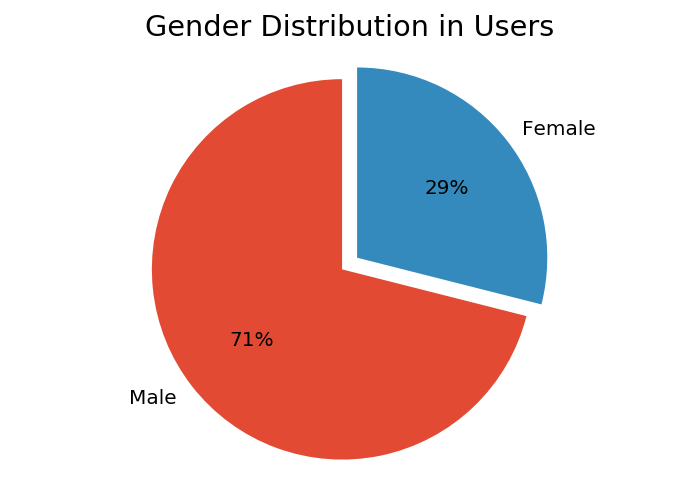

In [9]:
gender = user_df.loc[:,'gender']
user_pie = pd.value_counts(gender, sort= True)
print('Number of users by gender:\n',user_pie)
user_pie.plot(kind = 'pie', labels = ['Male','Female'], explode = (0, 0.1), autopct='%.0f%%', startangle=90)
plt.title('Gender Distribution in Users')
plt.axis('equal')
plt.ylabel('')
plt.show()

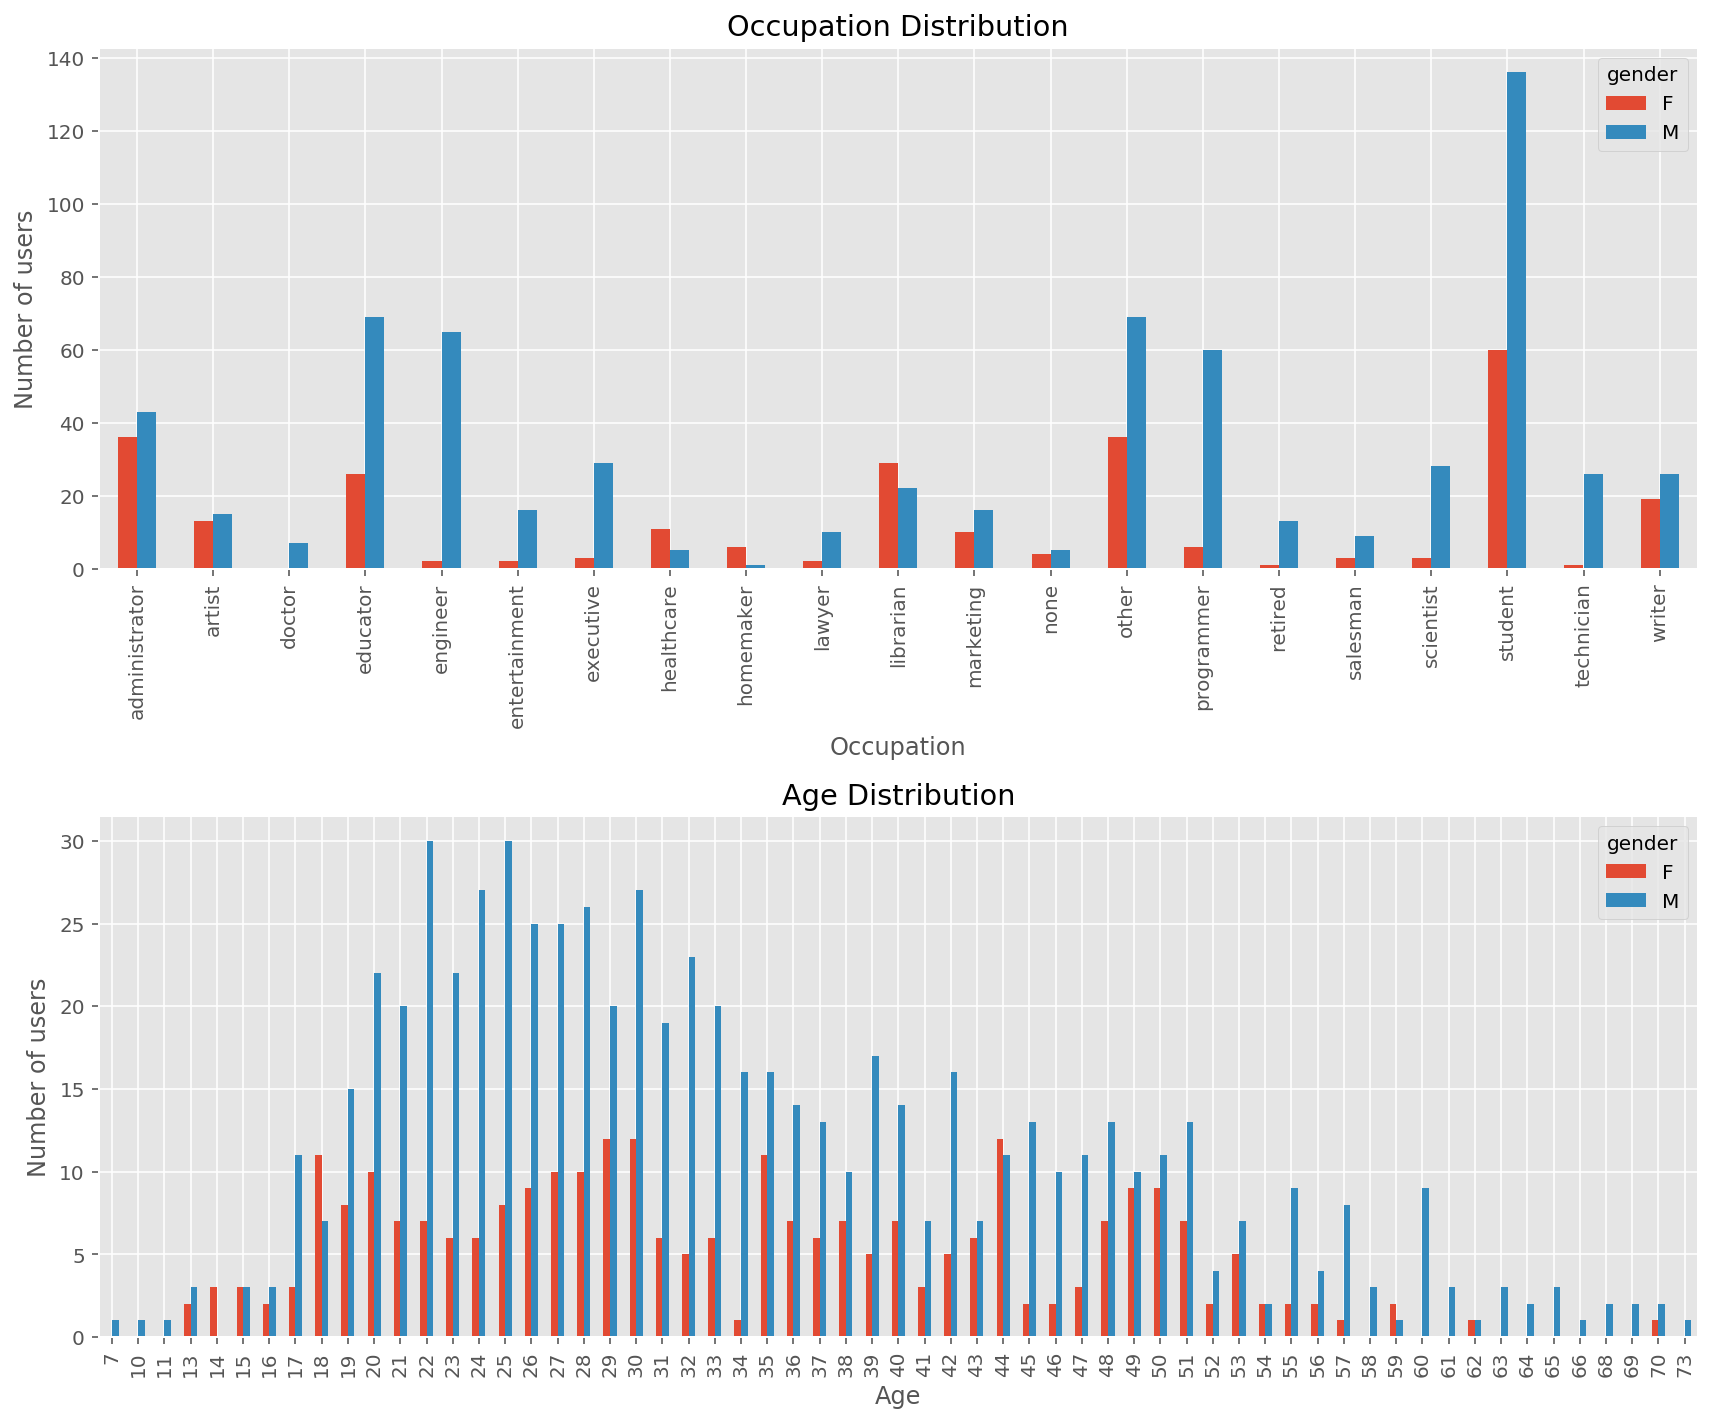

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
user_df.groupby(['occupation','gender'])['user_id'].size().unstack().plot.bar(ax=ax[0])
ax[0].set_xlabel('Occupation')
ax[0].set_ylabel('Number of users')
ax[0].set_title("Occupation Distribution")
user_df.groupby(['age','gender'])['user_id'].size().unstack().plot.bar(ax=ax[1])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of users')
ax[1].set_title("Age Distribution")
plt.tight_layout()
plt.show()

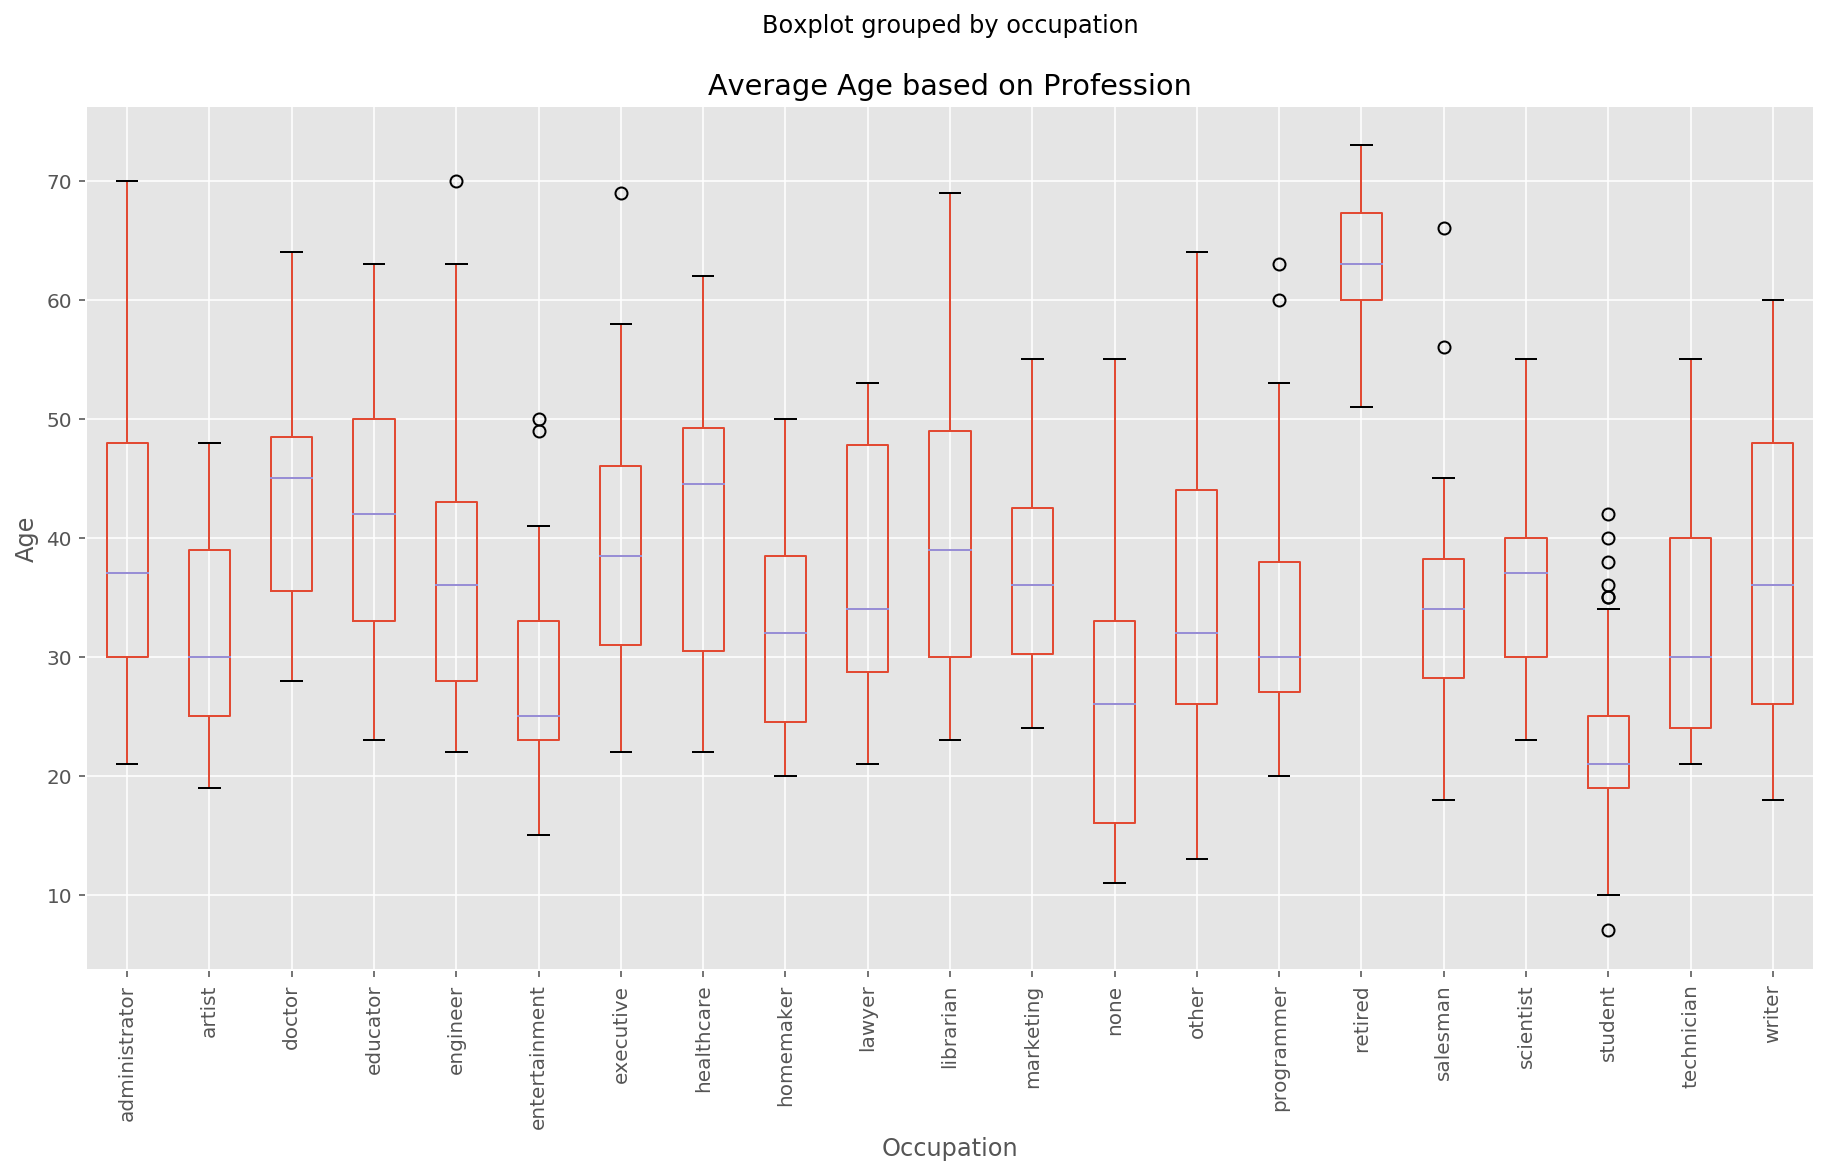

In [0]:
ax = user_df.boxplot(column='age', by='occupation', rot=90, figsize=(15, 8))
ax.set_ylabel('Age')
ax.set_xlabel('Occupation')
ax.set_title("Average Age based on Profession")
plt.show()

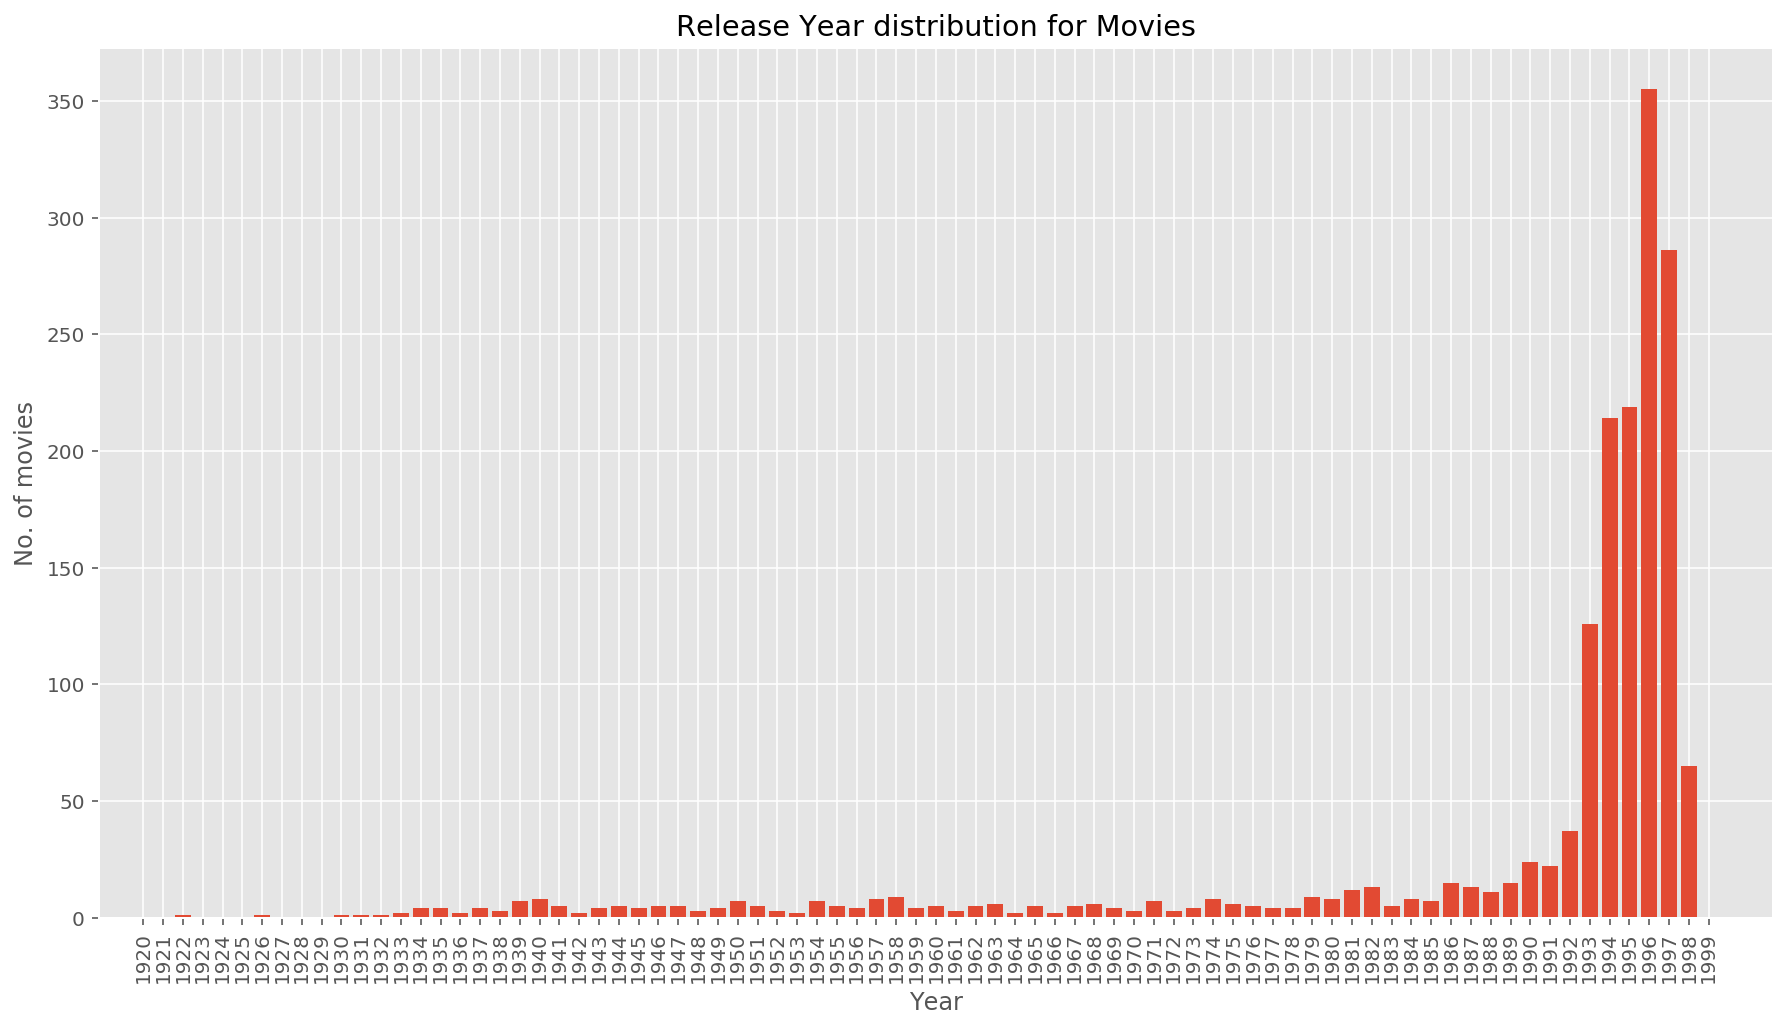

In [0]:
item_df['year'] = pd.DatetimeIndex(item_df['release_date']).year
count = collections.Counter(item_df['year'])
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(np.arange(1920,2000,1), rotation=90)
ax.bar(count.keys(), count.values(), align='center')
plt.title('Release Year distribution for Movies')
plt.xlabel('Year')
plt.ylabel('No. of movies')
plt.show()

#Drop extra "year" column after plot
item_df = item_df.drop(columns = ['year'])

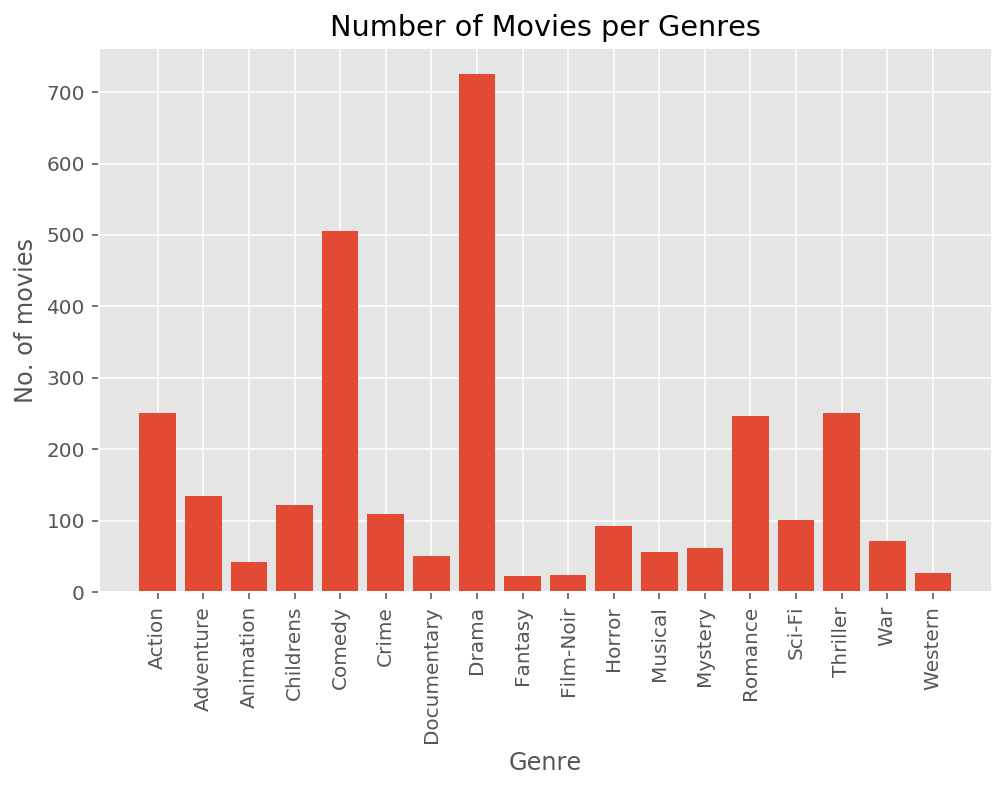

In [0]:
fig, ax = plt.subplots(figsize=(8, 5))
y_axis = (np.sum(item_df.loc[:,'Action':'Western'])).values
x_axis = [k for k,i in enumerate(y_axis)]
ax.bar(x_axis, y_axis, align = 'center')
x_label = (np.sum(item_df.loc[:,'Action':'Western'])).index
plt.xticks(rotation=90)
plt.xticks(x_axis, x_label)
plt.xlabel('Genre')
plt.ylabel("No. of movies")
plt.title("Number of Movies per Genres")
plt.show()

In [0]:
rat_dis={}  # Initialize dict
occupation = user_df['occupation'].unique()
for o in occupation:
    idx = list(user_df.loc[(user_df["occupation"] == o), "user_id"])
    rat_dis[o] = data_df.loc[data_df['user_id'].isin(idx),"rating"]

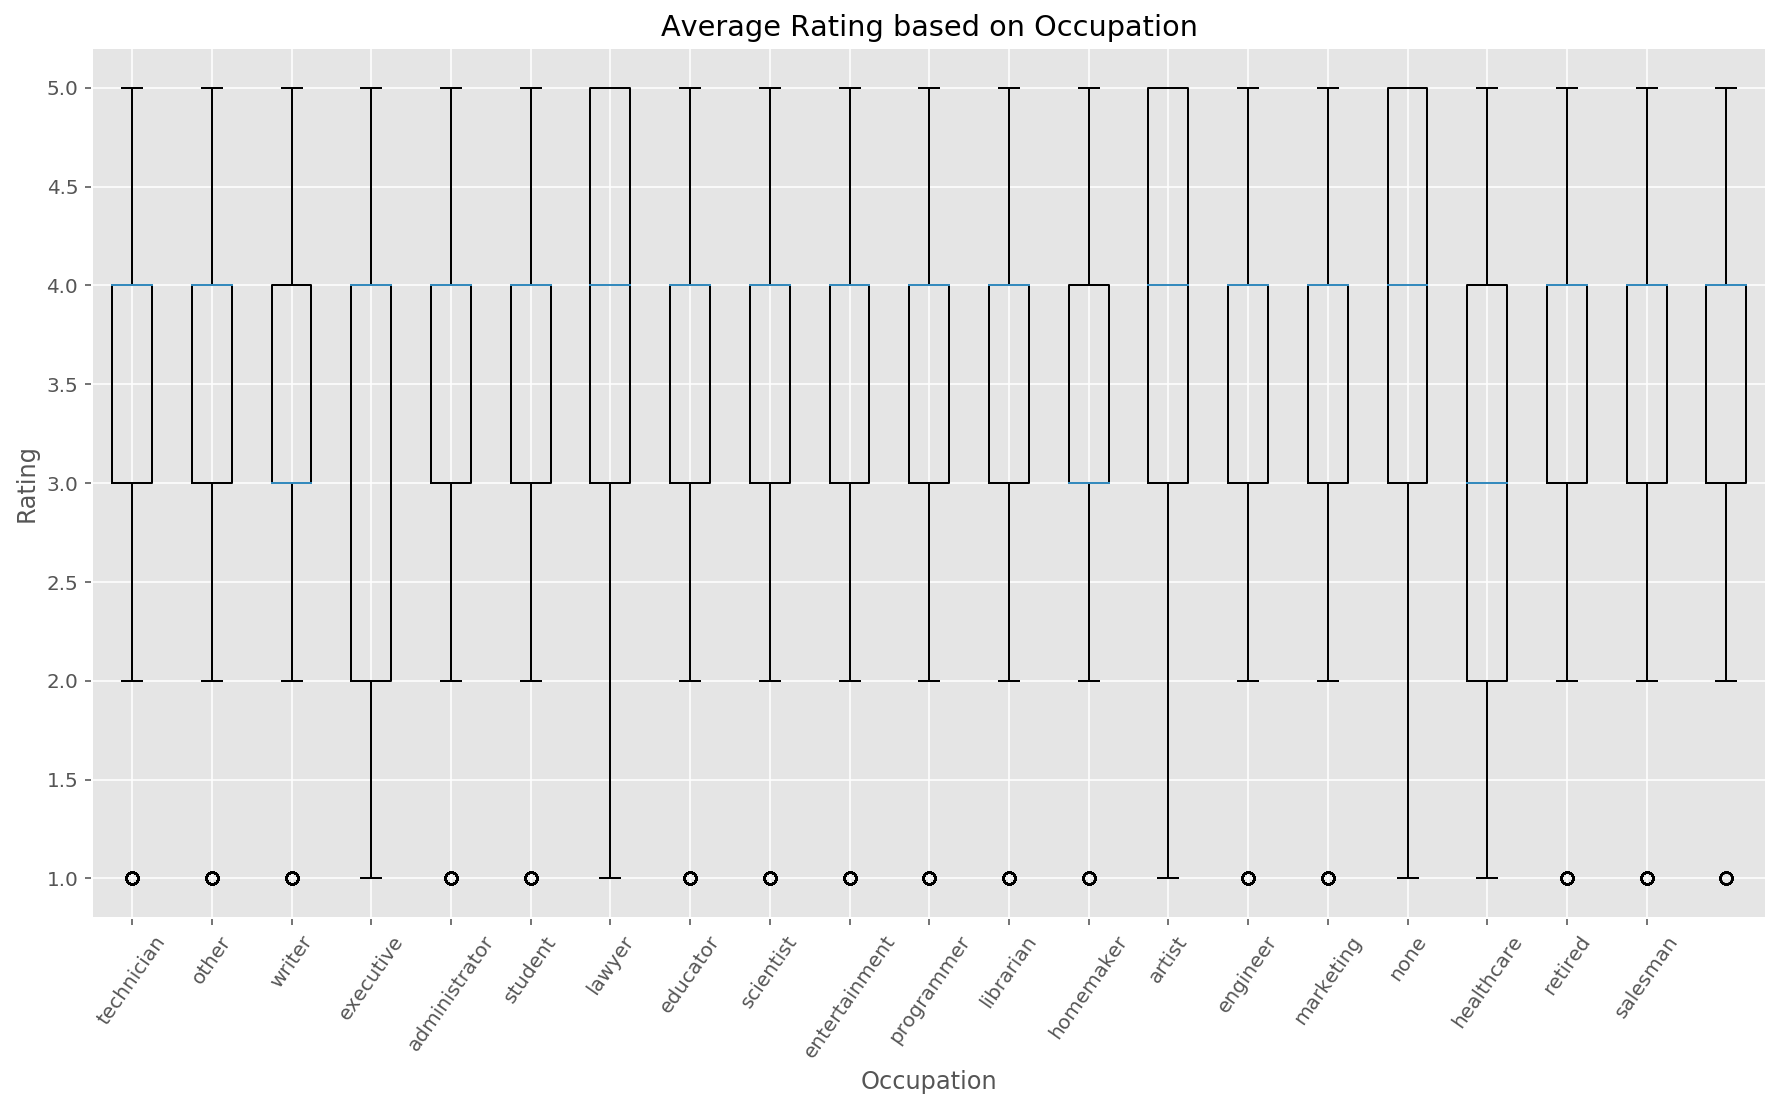

In [0]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
box = ax.boxplot(rat_dis.values())
plt.xticks(np.arange(1, len(occupation), 1), occupation, rotation=55)
plt.ylabel('Rating')
plt.xlabel('Occupation')
plt.title('Average Rating based on Occupation')
plt.show()

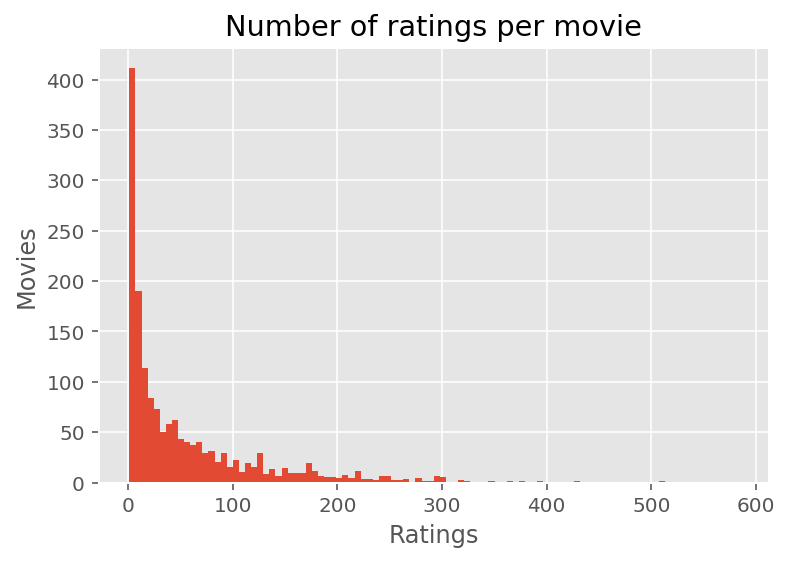

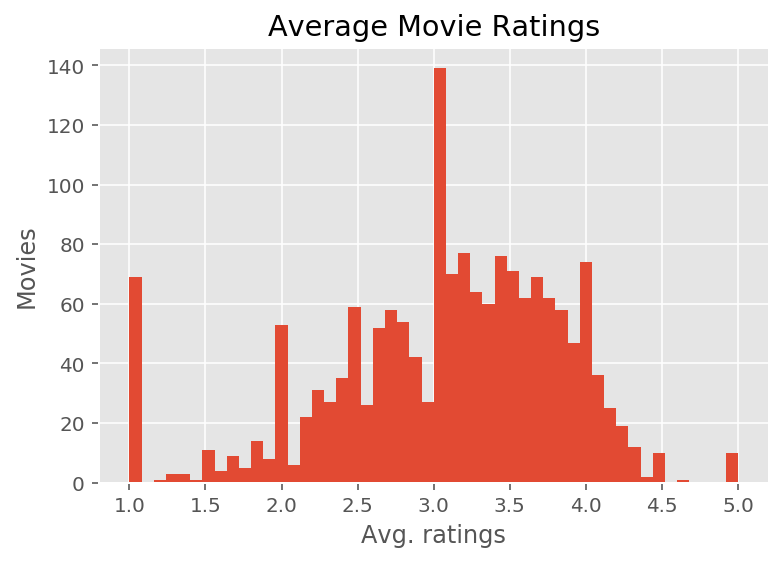

In [0]:
ratings_mean_count = pd.DataFrame(movielens_df.groupby('movie_title')['rating'].mean())  
ratings_mean_count['rating_counts'] = pd.DataFrame(movielens_df.groupby('movie_title')['rating'].count())
ratings_mean_count['rating_counts'].hist(bins=100) 
plt.title('Number of ratings per movie')
plt.xlabel('Ratings')
plt.ylabel('Movies')
plt.show()
ratings_mean_count['rating'].hist(bins=50)
plt.title('Average Movie Ratings')
plt.xlabel('Avg. ratings')
plt.ylabel('Movies')
plt.show()

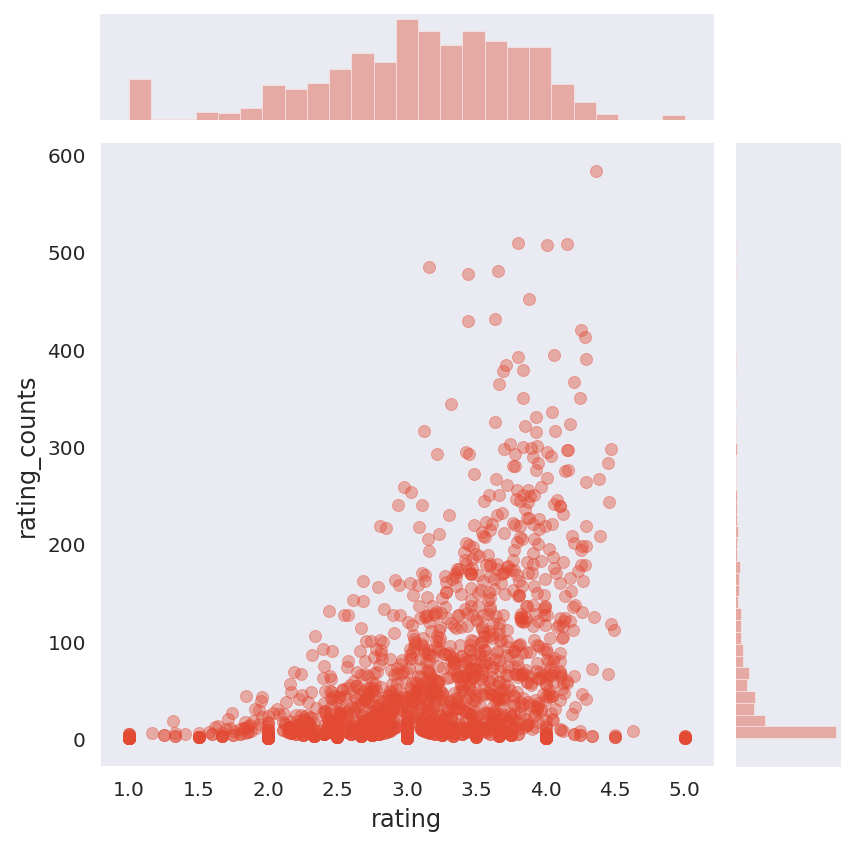

In [0]:
import seaborn as sns  
sns.set_style('dark')  

sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  
plt.show()

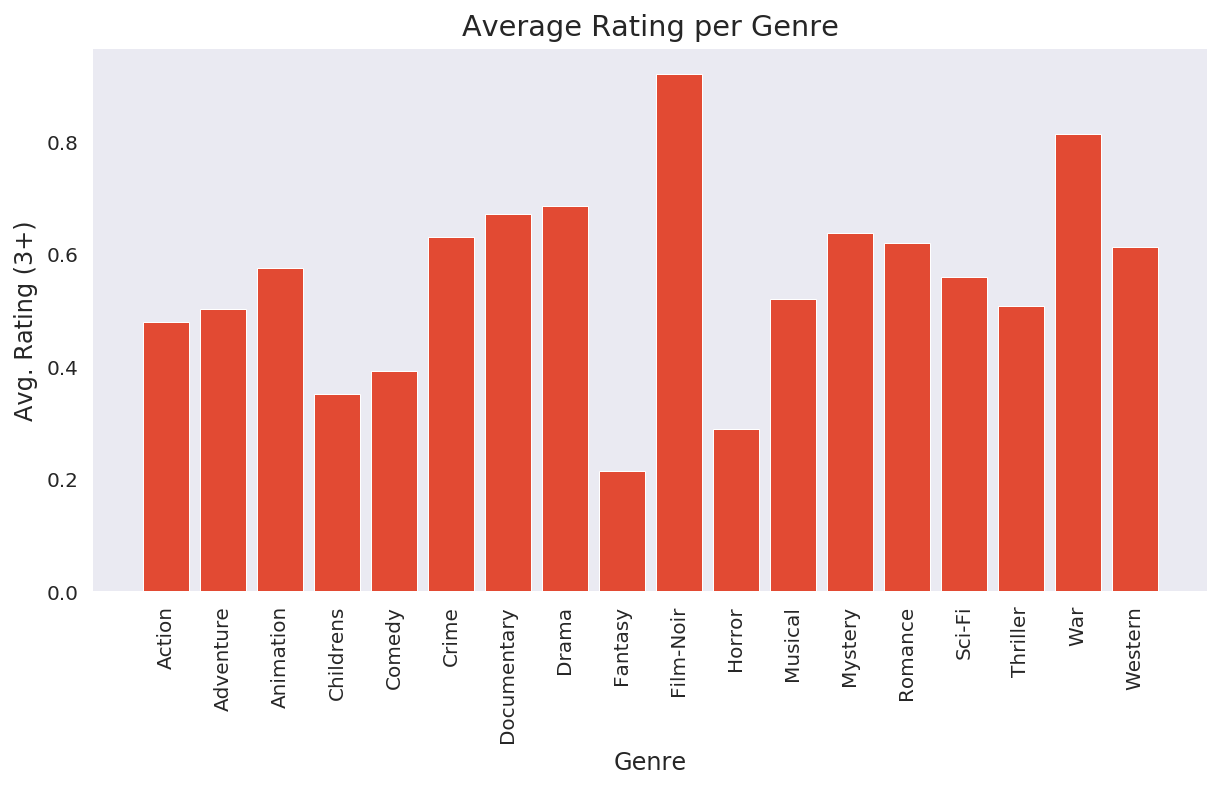

In [0]:
avg_rating_genre={}
genre_list = item_df.columns[6:].tolist()

# Joining data_df and item_df on id column
for g in genre_list:
    avg_rating_genre[g]=np.mean(data_df['rating'].loc[data_df['item_id']
                                                      .isin(list(item_df['movie_id'].loc[item_df[str(g)] == 1]))])-3

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(avg_rating_genre.keys(), avg_rating_genre.values(), align='center')
plt.xticks(rotation = 90)
plt.title("Average Rating per Genre")
plt.xlabel('Genre')
plt.ylabel('Avg. Rating (3+)')
plt.show()

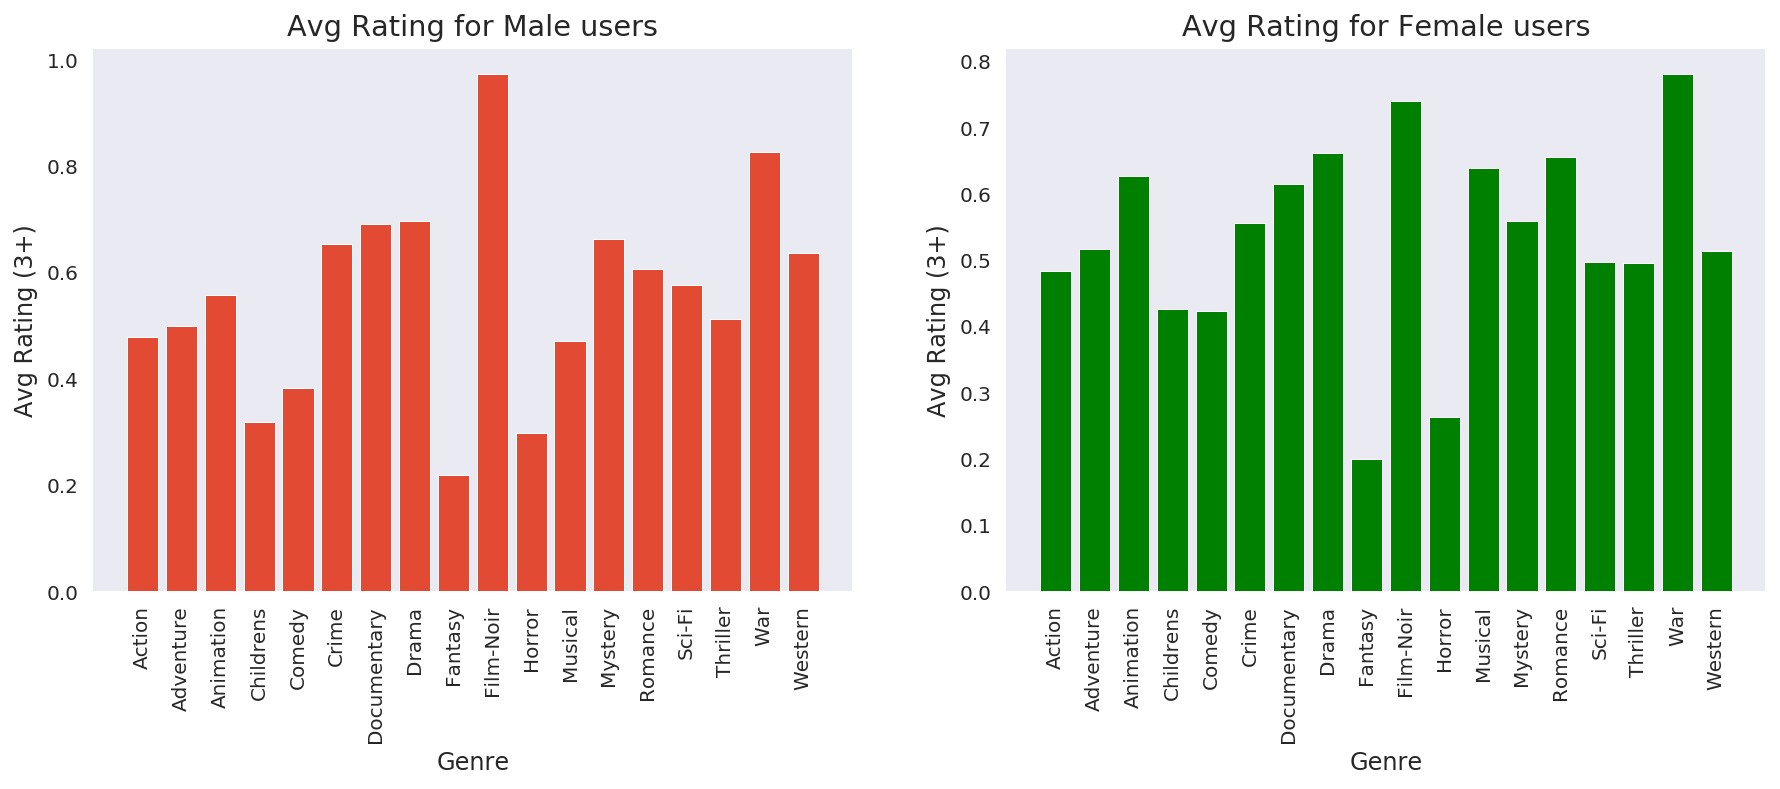

In [0]:
avg_rating_genre_male={}
for g in genre_list:
    iid = item_df['movie_id'].loc[item_df[str(g)] == 1]
    uid = user_df['user_id'].loc[user_df['gender'] == 'M']
    avg_rating_genre_male[g]=(np.mean(data_df['rating'].loc[(data_df['user_id'].isin(uid))
                                                            & data_df['item_id'].isin(iid)]))-3
    
avg_rating_genre_female={}
for g in genre_list:
    iid = item_df['movie_id'].loc[item_df[str(g)] == 1]
    uid = user_df['user_id'].loc[user_df['gender'] == 'F']
    avg_rating_genre_female[g]=(np.mean(data_df['rating'].loc[(data_df['user_id'].isin(uid))
                                                            & data_df['item_id'].isin(iid)]))-3
    
fig, ax = plt.subplots(1, 2,figsize=(15, 5))

ax[0].bar(avg_rating_genre_male.keys(), avg_rating_genre_male.values(), align='center')
ax[0].set_xticklabels(labels=avg_rating_genre_male.keys(), rotation=90)
ax[0].set_title('Avg Rating for Male users')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Avg Rating (3+)')

ax[1].bar(avg_rating_genre_female.keys(), avg_rating_genre_female.values(), align='center', color='green')
ax[1].set_xticklabels(labels=avg_rating_genre_female.keys(), rotation=90)
ax[1].set_title('Avg Rating for Female users')
ax[1].set_xlabel('Genre')
ax[1].set_ylabel('Avg Rating (3+)')
plt.show()

### Summary:

* We focus the analysis on user behaviour when it comes to movie ratings
* We can observe the a majority of users are male, students, and are young adults.
* The majority of movies rated were released after the year 1992, and belonging to the "Drama" genre.
* Using this demographic data, we can discover patterns on the movies being rated in relation to the user.
    * Depending on occupation, lawyers and artists etc. generally give higher ratings, compared to executives and healthcare professionals.
    * "Film-Noir" genre movies generally have the highest average ratings, while "Fantasy" genre has the lowest average rating.
    * Male and female users tend to vary slightly when it comes to their rating preferences, with female users generally giving higher average ratings.

## Exercise 2: Implement basic matrix factorization (MF) technique for recommender systems

From [5]; matrix factorization can be used to discover latent features underlying the interactions between two different kinds of entities. In this case, to predict movie ratings. We have a group of users and a set of items (movies for the above two systems). Given that each users have rated some items in the system, we would like to predict how the users would rate the items that they have not yet rated, and that we can make recommendations to the users (recommender system).

The idea behind this is that there are some **latent features** that determine how a user rates an item. If we can discover these latent features, we can predict a rating with respect to a certain user and a certain item. 

In this part we implement Matrix Factorization with **stochastic gradient descent**, based on the algorithm presented in the lab session below. The main idea is to predict, yhat - a ratings matrix $R^{m\times k}$ which is given by the dot product of the users and items matrix from the datafile. We learn *latent matrices* $P^{n \times k}$ and $Q^{m \times k}$, where $n$ = users, $m$ = items, and $k$ = latent dimesions, a hyperparameter.

$Predicted R = P×Q^T $

Where $P$ matrix is the strength of the associations between a user and features, and $Q$ matrix is the strength of the associations between an item and features.

<img src="https://i.imgur.com/M7tGPjl.jpg" width="45%" align="left"/>
<img src="https://i.imgur.com/gblw5kx.jpg" width="45%" align="left"/>

We have the following hyperparameters to optimize:
* $\lambda$, regularization constant
* $\alpha$, learning rate
* $k$, latent dimensions

This is optimized by SGD, computing the errors including regularization term. Similar to the previous lab, we can make use of sklearn.pipeline to streamline the iterations through each hyperparameter combination. We use cross validation to identify the best hyperparameter combinations. After that, the predicted ratings vs ground truth error rate (RMSE) is computed on the test set.

The algorithm above is wrapped in a class compromising several functions, the main references are from [5,6].

In [11]:
min_val = movielens_df['rating'].min()
max_val = movielens_df['rating'].max()
movielens_df['rating'] = (movielens_df['rating']-min_val)/(max_val-min_val) 
R = movielens_df.pivot_table(index='user_id', columns='movie_title', values='rating').fillna(0) 
R = np.array(R)
R.shape

(943, 1664)

We obtain P and Q by intializing some values, and calculate the RMSE between the estimated rating and the real rating.

$E=∑_{(u_i,d_j,r_{ij})∈T}e_{ij}=∑_{(ui,dj,rij)∈T}(r_{ij}−∑^K_{k=1}p_{ik}q_{kj})^2$

In [0]:
def rmse(R, predicted):
        """
        A function to compute the total mean square error
        """
        xs, ys = R.nonzero()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

We also add biases in order to improve the model on how a rating is generated:

In [0]:
def full_matrix(P, Q, b, b_u, b_i):
        """
        Compute the full matrix using the resultant biases, P and Q
        """
        return b + b_u[:,np.newaxis] + b_i[np.newaxis:,] + P.dot(Q.T)


In [0]:
def get_rating(P, Q, b, b_u, b_i, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = b + b_u[i] + b_i[j] + P[i, :].dot(Q[j, :].T)
        return prediction

We introduce the regularization term, $\beta$, adding to the update step:
$β/2∑^K_{k=1}(||P||^2+||Q||^2)$

In [0]:
def sgd(samples, alpha, beta, P, Q, b, b_u, b_i):
    for i, j, r in samples:
        prediction = get_rating(P, Q, b, b_u, b_i, i, j)
        e = (r - prediction)
        b_u[i] += alpha * (e - beta * b_u[i])
        b_i[j] += alpha * (e - beta * b_i[j])
        P[i, :] += alpha * (e * Q[j, :] - beta * P[i,:])
        Q[j, :] += alpha * (e * P[i, :] - beta * Q[j,:])
        
    return P, Q, b_u, b_i

In [0]:
# Create a list of training samples
def learn_latent_factors(R, k, alpha, beta, iterations = 10):
    """
            Perform matrix factorization to predict empty
            entries in a matrix.
            
    Arguments
            - R (ndarray)   : user-item rating matrix
            - k (int)       : number of latent dimensions
            - alpha (float) : learning rate
            - beta (float)  : regularization parameter
    """
    num_users = R.shape[0]
    num_items = R.shape[1]
    
    # Initialize user and item latent feature matrice
    P = np.random.normal(scale=1./ k, size=(num_users, k))
    Q = np.random.normal(scale=1./ k, size=(num_items, k))

    # Initialize the biases
    b_u = np.zeros(num_users)
    b_i = np.zeros(num_items)
    b = np.mean(R[np.where(R != 0)])
    
    # Sample non-zero entries
    samples = [
        (i, j, R[i, j])
        for i in range(num_users)
            for j in range(num_items)
                if R[i, j] > 0
            ]

    # Perform stochastic gradient descent for number of iterations
    training_process = []
    for i in range(iterations):
        # For each fold
        fold_accuracy = []
        for fold in range(0,3):
            np.random.shuffle(samples)
            train_sample = samples[:int(len(samples)*2/3)]
            test_sample = samples[int(len(samples)*2/3):]

            # Perform SGD
            P, Q, b_u, b_i = sgd(train_sample, alpha, beta, P, Q, b, b_u, b_i)

            # Get new predicted matrix
            predicted = full_matrix(P, Q, b, b_u, b_i)

            # Calculate RMSE
            error = rmse(R, predicted)
            fold_accuracy.append(error)   

        training_process.append(np.mean(fold_accuracy))
    print("a = %.3f, b = %.3f, k = %d,  error = %.4f" % (alpha, beta, k, np.mean(fold_accuracy)))
    return training_process, alpha, beta, k

a = 0.100, b = 0.100, k = 100,  error = 63.4707


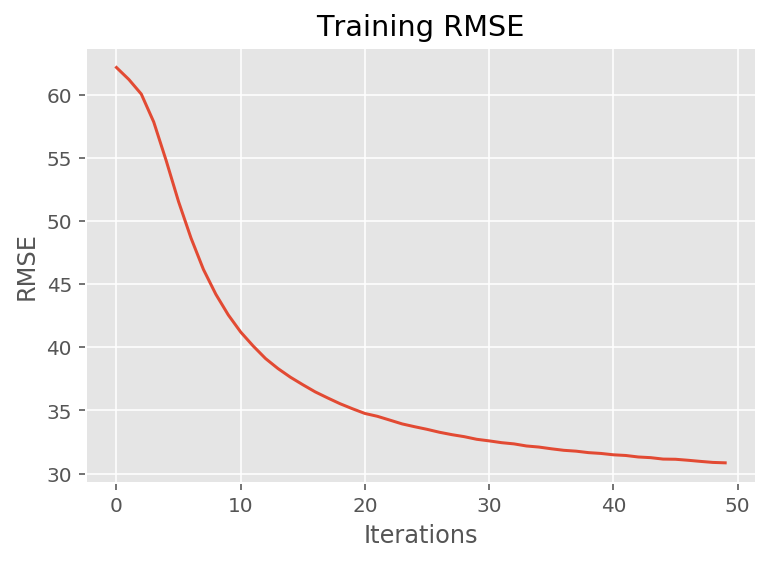

In [0]:
RMSE, alpha, beta, k = learn_latent_factors(R, k = 100, alpha = 0.1, beta = 0.1, iterations = 20)

plt.plot(RMSE)
plt.title('Training RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.show()

With the curent hyperparameter combinations, we obtain RMSE of 63.5373. We can do a grid search to obtain the optimal hyperparameter combinations for this model.


In [0]:
hyp_df = pd.DataFrame(columns=['Learning_rate','Regularization','K_latent_dims','RMSE'])
alphas = [0.001, 0.01, 0.05]
betas = [0.001, 0.01, 0.1]
ks = [10, 20, 30]

for a in alphas:
    for b in betas:
        for k in ks:
            RMSE, alpha, beta, k = learn_latent_factors(R, k, a, b, iterations = 20)
            hyp_df = hyp_df.append({'Learning_rate': alpha, 'Regularization': beta,'K_latent_dims':k, 'RMSE': RMSE}, 
                                   ignore_index=True)

a = 0.001, b = 0.001, k = 10,  error = 61.7462
a = 0.001, b = 0.001, k = 20,  error = 61.3921
a = 0.001, b = 0.001, k = 30,  error = 61.4361
a = 0.001, b = 0.010, k = 10,  error = 61.6352
a = 0.001, b = 0.010, k = 20,  error = 61.4203
a = 0.001, b = 0.010, k = 30,  error = 61.4686
a = 0.001, b = 0.100, k = 10,  error = 61.7005
a = 0.001, b = 0.100, k = 20,  error = 61.7078
a = 0.001, b = 0.100, k = 30,  error = 61.7163
a = 0.010, b = 0.001, k = 10,  error = 57.2716
a = 0.010, b = 0.001, k = 20,  error = 56.5487
a = 0.010, b = 0.001, k = 30,  error = 56.7195
a = 0.010, b = 0.010, k = 10,  error = 58.8235
a = 0.010, b = 0.010, k = 20,  error = 59.0963
a = 0.010, b = 0.010, k = 30,  error = 59.4368
a = 0.010, b = 0.100, k = 10,  error = 61.1043
a = 0.010, b = 0.100, k = 20,  error = 61.1133
a = 0.010, b = 0.100, k = 30,  error = 61.1202
a = 0.050, b = 0.001, k = 10,  error = 49.8435
a = 0.050, b = 0.001, k = 20,  error = 41.7891
a = 0.050, b = 0.001, k = 30,  error = 35.3002
a = 0.050, b 

In [0]:
hyp_df['Avg_RMSE'] = pd.DataFrame(hyp_df['RMSE'].values.tolist()).mean(1)

In [0]:
hyp_df  = hyp_df.drop(['RMSE'], axis=1)
hyp_df

,Learning_rate,Regularization,K_latent_dims,Avg_RMSE
0,0.001,0.001,10,63.519193
1,0.001,0.001,20,63.028152
2,0.001,0.001,30,63.033936
3,0.001,0.010,10,63.429109
4,0.001,0.010,20,63.044236
5,0.001,0.010,30,63.057923
6,0.001,0.100,10,63.408861
7,0.001,0.100,20,63.251449
8,0.001,0.100,30,63.235568
9,0.010,0.001,10,59.716230


In [0]:
hyp_df.min()

Learning_rate      0.001000
Regularization     0.001000
K_latent_dims     10.000000
Avg_RMSE          45.497062
dtype: float64

Now we identifed the optimation combination of learning rate, regularization parameter, and k latent dims. We can peform the predictios on test set to get the RMSE value.

a = 0.001, b = 0.001, k = 10,  error = 60.6043


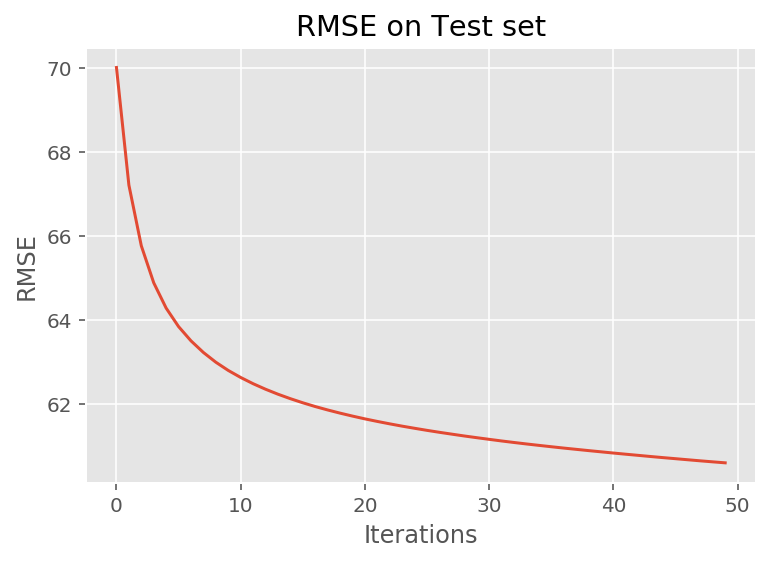

In [17]:
alpha, beta, k = 0.001, 0.001, 10

RMSE, alpha, beta, k = learn_latent_factors(R, k, alpha, beta, iterations = 50)

plt.plot(RMSE)
plt.title('RMSE on Test set')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.show()

We get the final RMSE on test set as 60.5966

### Exercise 3: Recommender Systems using matrix factorization libmf / sckit-learn

Now we can use sklearn module to implement matrix factorization. We train the model using a range of hyperparameters, which are optimized using GridSearch and 3-fold Cross Validation. But the method is not SGD has it's not available in NMF, hence we are using **Coordinate Descent** method here.

From [7], NMF is non-negative matrix factorization. The function finds two non-negative matrices (W, H) whose product approximates the non-negative matrix X. The main idea is to work only on the non-zero entries, which reduces computational time especially when the matrix is very sparse. The main references are from [11, 12].

In [0]:
from sklearn.decomposition import NMF

matrix = data_df.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

In [0]:
from sklearn.decomposition import NMF

def grid_search(h_p):
    """
    Performs grid search using validation set, 3-folds CV
    return the score matrix and hyper parameter with lowest RMSE
    Since we are using custom parameters, we need to supply the W and H matrix.
    """       
    grid_score={}  # Store in dict
    k=0
    for itr,n,alp in h_p:
        nmf = NMF(n_components=n,solver='cd', max_iter=itr, alpha=alp)
        fold = folds()
        score=0
        for i in range(0,3):
            nmf.fit(matrix.drop(index=fold[i]))
            H = pd.DataFrame(nmf.components_, columns=matrix.columns)
            W = pd.DataFrame(nmf.transform(matrix), columns=H.index)
            constructor = pd.DataFrame(np.dot(W,H), columns=matrix.columns)
            constructor.index = matrix.index
            score+=predict(data_df.loc[fold[i]],constructor)
        grid_score[k]=(score)/3
        k+=1
    return grid_score,min(grid_score, key=grid_score.get)


def predict(X,new_X):
    """'''
    RMSE with predicted ratings vs actual ratings
    """
    actual_score, y_pred = [], []
    for index,row in X.iterrows():
        user,item=int(row['user_id']),int(row['item_id'])
        actual_score.append(row['rating'])
        y_pred.append(new_X[item][user])
        rmse = np.sqrt(np.sum((np.array(actual_score) - np.array(y_pred)) ** 2)/len(actual_score))
    return rmse


def folds():
    """
    Creates kfolds with indexes for all the 943 items
    """
    folds = {}
    indexes = np.arange(1,944,1)
    unit_length= round(len(indexes)/3)
    np.random.shuffle(indexes)
    a = 0,
    b = unit_length
    for i in range(3):
        folds[i]=indexes[a:b]
        a = b
        b += unit_length
    return folds
  

def hpy_combination(max_iter,n_components,alpha):
    """Hyperparameter combinations
    """
    h_p = []
    for x in max_iter:
        for y in n_components:
            for z in alpha:
                h_p.append([x,y,z])
    return h_p

Only a small range of values are chosen arbitarily, anyway the code takes too long to run even on Google Colabs. Matrix Factorization on a very large matrix is always going to be slow.

In [0]:
max_iter = [50]
n_components=[20,25,30]
alpha=[0.01,0.001,0.0001]
hyp = hpy_combination(max_iter,n_components,alpha)
scores, optimal_key = grid_search(hyp)

In [0]:
print("Dictionary values for learning rate and K, 50 iterations")
for k,v in scores.items():
    print(hyp[k],"; RMSE:", np.around(v,4))

Dictionary values for learning rate and K, 50 iterations
[50, 20, 0.01] ; RMSE: 2.2595
[50, 20, 0.001] ; RMSE: 2.2463
[50, 20, 0.0001] ; RMSE: 2.259
[50, 25, 0.01] ; RMSE: 2.2171
[50, 25, 0.001] ; RMSE: 2.2105
[50, 25, 0.0001] ; RMSE: 2.2036
[50, 30, 0.01] ; RMSE: 2.1957
[50, 30, 0.001] ; RMSE: 2.1704
[50, 30, 0.0001] ; RMSE: 2.1972


In [0]:
test_data = pd.read_csv('/content/drive/My Drive/ml-100k/ua.test',sep='\t',header = None, names = data_column_names)
X_test = test_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

In [0]:
#Hyperparameter with lowest RMSE
print("Optimal hyperparameter combination:",hyp[optimal_key])

Optimal hyperparameter combination: [50, 30, 0.001]


In [1]:
def clf(data, X_test, n, itr, alp, solver='cd'):
    X_test = data.pivot(index='user_id',columns='item_id',values='rating').fillna(0)
    nmf = NMF(n_components=n,solver='cd', max_iter=itr, alpha=alp)
    nmf.fit(X_test)
    H = pd.DataFrame(nmf.components_, columns=matrix.columns)
    W = pd.DataFrame(nmf.transform(matrix), columns=H.index)
    constructor = pd.DataFrame(np.dot(W,H), columns=matrix.columns)
    constructor.index = matrix.index
    return predict(data, constructor)

In [0]:
score = clf(data_df,X_test,30,50,0.001)
print('RMSE on test set with optimal hyperparameter:',np.round(score,4))

RMSE on test set with optimal hyperparameter: 2.16


### Additional library

Besides using sklearn's NMF, we can use the "surprise" library (also on PyPi) to build a recommender system. Based on [9], a quick code is as follows:

In [0]:
!pip install scikit-surprise
from surprise import NMF
from surprise import Dataset
from surprise.model_selection import cross_validate


dataset = Dataset.load_builtin('ml-100k')
algo = NMF()

# Run 5-fold cross-validation and print results.
cross_validate(algo, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

     |████████████████████████████████| 6.5MB 5.2MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678228 sha256=7b135fa6f24f486b0bce650a03794ec3202af8961054cf6fb4d2a68e29c615a1
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise
Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9666  0.9641  0.9494  0.9669  0.9688  0.9632  0.0070  
MAE (testset)     0.7601  0.7598  0.7465  0.7568  0.7625  0.7571  0.0056  
Fit time          5.39    5.49    5.51    5.58    5.57    5.51    0.07    
Test time         0.12    0.12    

{'fit_time': (5.393765926361084,
  5.486340284347534,
  5.513825178146362,
  5.576796531677246,
  5.567748546600342),
 'test_mae': array([0.76005358, 0.75975594, 0.74648475, 0.75683251, 0.76251559]),
 'test_rmse': array([0.96662401, 0.96413086, 0.9494046 , 0.96687502, 0.96878598]),
 'test_time': (0.12277007102966309,
  0.11760354042053223,
  0.12854337692260742,
  0.22836899757385254,
  0.12585210800170898)}

Surprise module is extremely efficient and easy to us. The above is just a brief show of its capabilities, as there are many more functions available. But its not as mature as sklearn, hence documentation and support is limited.

# Conclusion

We ran three models to calculate RMSE on test set  - MF implementation using numpy, sklearn.NMF, and suprise.NMF. The results obtained are:
1. Numpy: 60.43
2. Sklearn: 2.16
3. Suprise: 0.9635

Compared to the baseline in [10] which has RMSE of 0.9212, Model (1) has the lowest RMSE, whereas Model (2) is pretty good, and Model (3) has the best performance, almost reaching that of the baseline. Obviously the manual implementation performs the poorest, possibly due to method of discovering latent features with biases attached. The number of latent dimensions are directly correlated to the RMSE. But these need to be chosen carefully, as the number of latent dimensions should not exceed the the dimensions of the input data. The aim of matrix factorization is to reduce a sparse matrix into an approximated yet compact product of 2 (or more) matrices. Increasing the inner-dimension of these factor matrices may give a better result, but it is computationally heavier and thus it is equivalent to storing the matrix in it's original form. In fact, Model (1) takes extremely long run, around 1 hour in Google Colabs.

# References

[1] http://grouplens.org/datasets/movielens/100k/<br>
[2] https://www.kaggle.com/cesarcf1977/movielens-data-analysis-beginner-s-first <br>
[3] http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/ <br>
[4] https://d2l.ai/chapter_recommender-systems/movielens.html <br>
[5] http://www.albertauyeung.com/post/python-matrix-factorization/ <br>
[6] https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d <br>
[7] https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html <br>
[8] https://stackoverflow.com/questions/49341132/using-nmf-for-generating-recommendations<br>
[9] http://surpriselib.com/<br>
[10] http://www.mymedialite.net/examples/datasets.html<br>
[11] https://stackoverflow.com/questions/49850435/custom-matrix-in-nmf-in-scikit-learn <br>
[12] https://stackoverflow.com/questions/29648955/sklearn-matrix-factorization-example <br>